In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import hydracv.utils.utils as utils

In [3]:
# Load fluorescence
fluo = pd.read_csv("/home/hengji/Data/hydracv/hydracv/data/fluorescence/" + "total_fluo_Pre_Bisect_40x_4fps_ex3.csv").values.reshape(-1)

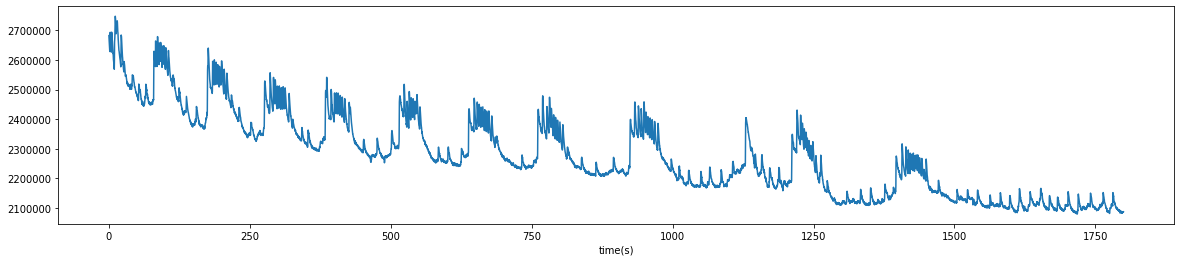

In [5]:
FPS = 4

# Plot the fluorescence (x axis is real time)
xtime = np.arange(0, len(fluo)/FPS, 1/FPS)
plt.figure(figsize=(20,4))
plt.plot(xtime, fluo)
plt.xlabel('time(s)')
plt.show()

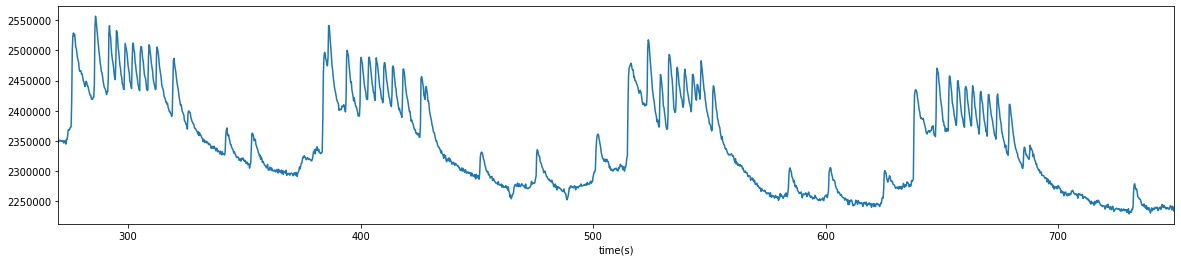

In [20]:
# Slice the fluorescence and keep the starting time
t_start = 270
t_end = 750
start = t_start * FPS
end = t_end * FPS

xtime_sliced = xtime[start:end]
fluo_sliced = fluo[start:end]

plt.figure(figsize=(20,4))
plt.plot(xtime_sliced, fluo_sliced)
plt.xlabel('time(s)')
plt.xlim(t_start, t_end)
plt.show()

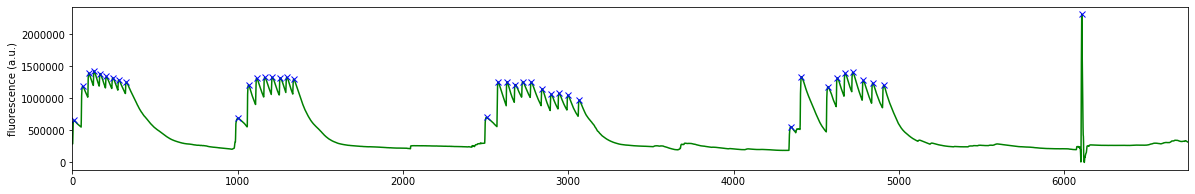

In [6]:
# Find peaks and extract their moments
peaks_index = utils.find_peaks(fluo_sliced, height=0.1, wlen=100, prominence=0.025, min_cb_interval=10, realign=True, start=0, end=-1)
peaks_index = [x+start for x in peaks_index]

In [7]:
ind_first_peak = peaks_index[0]
t_first_peak = peaks_index[0] / FPS
# Processed peaks indices to the time moments
t_peaks = []
for peak in peaks_index:
    t_peaks.append(peak/FPS - t_first_peak)

In [89]:
# Load the length
length = pd.read_csv("/home/hengji/Data/hydracv/hydracv/data/length/" + "lengths_EGCaMP_ctrl_30mins_40x_10fps_mv1.csv").values.reshape(-1)

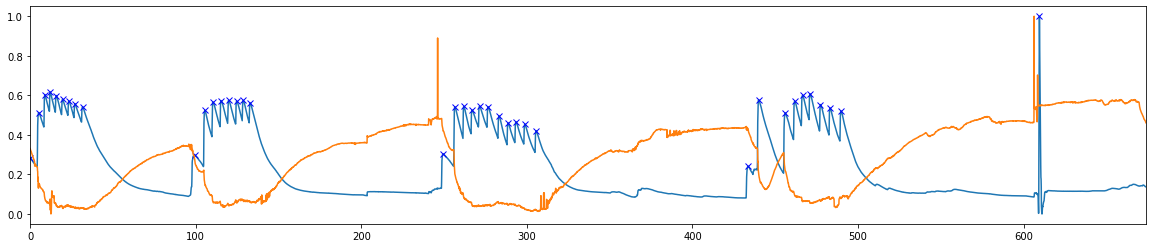

In [90]:
# Align the sequences based on the first spike moment
xtime_aligned = [x-t_first_peak for x in xtime_sliced[ind_first_peak-start:]]
fluo_aligned = fluo_sliced[ind_first_peak-start:]
fluo_aligned = utils.normalize(fluo_aligned)
length_aligned = length[ind_first_peak:ind_first_peak+len(fluo_aligned)]
length_aligned = utils.normalize(length_aligned)

plt.figure(figsize=(20,4))
plt.plot(xtime_aligned, fluo_aligned)
plt.plot([x for x in t_peaks], np.array(utils.normalize(fluo))[peaks_index], 'xb')
plt.plot(xtime_aligned, length_aligned)
plt.xlim(0, t_end-t_first_peak)
plt.show()

In [91]:
for x in t_peaks:
    print(round(x,2), end=', ')

0.0, 5.2, 9.0, 12.1, 15.8, 19.6, 23.5, 27.0, 31.7, 99.3, 105.6, 110.4, 115.3, 119.9, 124.8, 128.6, 132.9, 249.5, 256.5, 262.0, 267.0, 271.5, 276.6, 283.2, 288.7, 293.4, 298.8, 305.6, 433.5, 440.0, 456.0, 461.7, 466.5, 471.0, 477.3, 483.1, 489.8, 609.5, 